In [1]:
#This is the notebook for testing the pipeline before pushing any changes
import localnmf 
from localnmf import superpixel_analysis_ring
import os
import numpy as np
import scipy
import scipy.sparse
import torch_sparse
import torch

from localnmf import visualization
from localnmf.visualization import standard_demix_vid_m
import scipy.sparse
import scipy
import matplotlib.pyplot as plt
from localnmf.pmd_video import PMDVideo
%load_ext line_profiler

In [2]:
input_file = "../datasets/decomposition.npz"
data = np.load(input_file, allow_pickle=True)

In [3]:
U_sparse = scipy.sparse.csr_matrix(
        (data['U_data'], data['U_indices'], data['U_indptr']),
        shape=data['U_shape']
    ).tocsr()
order = data.get('fov_order', np.array("C")).item()
shape = data['U_shape']
d1,d2 = data['fov_shape']

R = data['R']
s = data['s']
Vt = data['Vt']
T = Vt.shape[1]
device='cpu'

# Initialize PMD Object which stores the state of the demixing procedure

In [4]:
pmd_video = PMDVideo(U_sparse, R, s, Vt,(d1, d2, T), data_order=order, device=device)

# First pass initialization of neural signals

the time to run the one time only local corr data structure computation is 0.15013432502746582
find superpixels!
find pure superpixels!
prepare iteration!


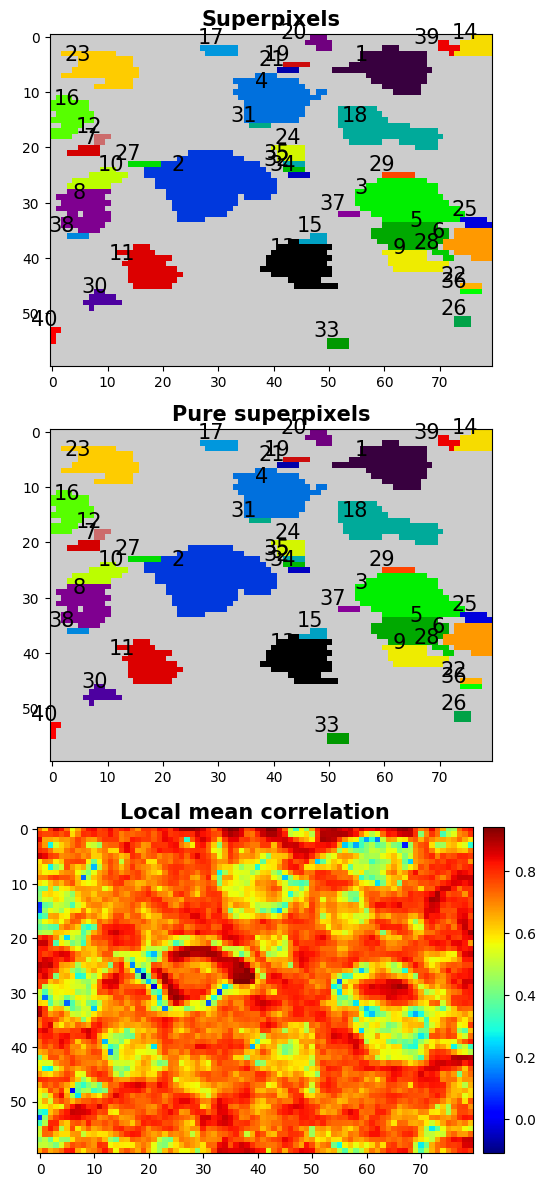

the time to run pure superpixelization is 1.302065134048462


In [5]:
num_plane = 1
cut_off_point = 0.9
residual_cut = 0.1
length_cut = 3
th = 2
pseudo_2 = 0.1

pmd_video.initialize_signals_superpixels(num_plane, cut_off_point, residual_cut, length_cut, th, pseudo_2, \
                                       text =True, plot_en = True)

# Run the demixing procedure

In [6]:
# localnmf_params = {
#         'init': ['lnmf', 'lnmf', 'lnmf', 'lnmf'],
#         'pseudo_2':[0.1, 0.1, 0.1, 0.1],
#         'corr_th_fix':0.55,
#         'switch_point':5,
#         'corr_th_fix_sec':0.7,
#         'corr_th_del':0.2,
#         'merge_corr_thr':0.7,
#         'merge_overlap_thr':0.7,
#         'r':20,
#         'residual_cut':[0.5, 0.6, 0.6, 0.6],
#         'num_plane': 1,
#         'patch_size': [100,100],
#         'maxiter': 25,
#         'update_after':4, 
#         'plot_en': False,
#         'skips':0,
# }

# corr_th_fix=localnmf_params['corr_th_fix'] 
# switch_point = localnmf_params['switch_point']
# corr_th_fix_sec = localnmf_params['corr_th_fix_sec']
# corr_th_del = localnmf_params['corr_th_del']

# merge_corr_thr= localnmf_params['merge_corr_thr']
# merge_overlap_thr= localnmf_params['merge_overlap_thr']
# ring_radius =  localnmf_params['r']
# pseudo_2 = localnmf_params['pseudo_2']


# residual_cut = localnmf_params['residual_cut']
# num_plane= localnmf_params['num_plane']
# patch_size= localnmf_params['patch_size'] 
# plot_en = localnmf_params['plot_en'] 
# maxiter= localnmf_params['maxiter']
# update_after = localnmf_params['update_after']
# skips= localnmf_params['skips'] 
# plot_debug = False
# denoise = [False for i in range(maxiter)]



# with torch.no_grad():

#     a, c, b, X, W, res, corr_img_all_r, num_list = superpixel_analysis_ring.update_AC_bg_l2_Y_ring_lowrank(pmd_video, maxiter, corr_th_fix, \
#                                                                                                            corr_th_fix_sec, corr_th_del, switch_point, skips, \
#                                                                                                            merge_corr_thr, merge_overlap_thr, ring_radius, denoise=denoise,\
#                                                                                                            plot_en=plot_en, plot_debug=plot_debug, update_after=update_after)
#     W_final = W.create_complete_ring_matrix(a)
#     fin_rlt = {'U_sparse': pmd_video.U_sparse.cpu().to_scipy(layout='csr'), 'R': pmd_video.R.cpu().numpy(), 'V': pmd_video.V.cpu().numpy(), 'a':a, 'c':c, 'b':b, "W":W_final, \
#                'res':res, 'corr_img_all_r':corr_img_all_r, 'num_list':num_list, 'data_order': pmd_video.data_order, 'data_shape':pmd_video.shape};




number of elts in ring is 124
the max of good components is True
time: 0.1945171356201172
time: 0.13599395751953125
time: 0.13509607315063477
mask, support, and deletion update
making dynamic support updates
entering thresholding..
merging components
> /data/home/app2139/rlocalnmf/localnmf/pmd_video.py(1525)merge_components()
   1523     """
   1524     pdb.set_trace()
-> 1525     f = np.ones([c.shape[0],1]);
   1526     ############ calculate overlap area ###########
   1527     a = csc_matrix(a);



ipdb>  c


no merge!
time: 2.685421943664551
time: 0.15662002563476562
time: 0.14727783203125
time: 0.1462116241455078
mask, support, and deletion update
making dynamic support updates
entering thresholding..
merging components
> /data/home/app2139/rlocalnmf/localnmf/pmd_video.py(1525)merge_components()
   1523     """
   1524     pdb.set_trace()
-> 1525     f = np.ones([c.shape[0],1]);
   1526     ############ calculate overlap area ###########
   1527     a = csc_matrix(a);



ipdb>  
ipdb>  c


merge[ 3 29 37]
merge[36 22]
time: 1.8170733451843262
time: 0.13521742820739746
time: 0.1458141803741455
time: 0.15135645866394043
mask, support, and deletion update
making dynamic support updates
entering thresholding..
merging components
> /data/home/app2139/rlocalnmf/localnmf/pmd_video.py(1525)merge_components()
   1523     """
   1524     pdb.set_trace()
-> 1525     f = np.ones([c.shape[0],1]);
   1526     ############ calculate overlap area ###########
   1527     a = csc_matrix(a);



ipdb>  c


merge[ 3 32]
time: 1.4670872688293457
time: 0.1302506923675537
time: 0.13072705268859863
time: 0.12964224815368652
mask, support, and deletion update
making dynamic support updates
entering thresholding..
merging components
> /data/home/app2139/rlocalnmf/localnmf/pmd_video.py(1525)merge_components()
   1523     """
   1524     pdb.set_trace()
-> 1525     f = np.ones([c.shape[0],1]);
   1526     ############ calculate overlap area ###########
   1527     a = csc_matrix(a);



ipdb>  c


no merge!
time: 1.5321345329284668
time: 0.13399004936218262
time: 0.13123869895935059
time: 0.13062334060668945
mask, support, and deletion update
making dynamic support updates
entering thresholding..
merging components
> /data/home/app2139/rlocalnmf/localnmf/pmd_video.py(1525)merge_components()
   1523     """
   1524     pdb.set_trace()
-> 1525     f = np.ones([c.shape[0],1]);
   1526     ############ calculate overlap area ###########
   1527     a = csc_matrix(a);



ipdb>  c


no merge!
time: 1.402714490890503
time: 0.15207266807556152
time: 0.132401704788208
time: 0.1316969394683838
mask, support, and deletion update
making dynamic support updates
entering thresholding..
merging components
> /data/home/app2139/rlocalnmf/localnmf/pmd_video.py(1525)merge_components()
   1523     """
   1524     pdb.set_trace()
-> 1525     f = np.ones([c.shape[0],1]);
   1526     ############ calculate overlap area ###########
   1527     a = csc_matrix(a);



ipdb>  c


no merge!
time: 1.4739694595336914
time: 0.13144731521606445
